# Planewaves in Homogeneous Media

The eigenmode source can also be used to launch [planewaves](https://en.wikipedia.org/wiki/Plane_wave) in homogeneous media. The dispersion relation for a planewave is ω=|$\vec{k}$|/$n$ where ω is the angular frequency of the planewave and $\vec{k}$ its wavevector; $n$ is the refractive index of the homogeneous medium. This example demonstrates launching planewaves in a uniform medium with $n$ of 1.5 at three rotation angles: 0°, 20°, and 40°. Bloch-periodic boundaries via the `k_point` are used and specified by the wavevector $\vec{k}$. PML boundaries are used only along the x-direction.

First, we'll load our necesarry modules:

In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

Using MPI version 3.1, 1 processes


Next, we'll create a function we can call multiple times that runs the simulation for different rotation angles:

In [2]:
def run_sim(rot_angle=0):

    resolution = 50  # pixels/μm

    cell_size = mp.Vector3(14, 10, 0)

    pml_layers = [mp.PML(thickness=2, direction=mp.X)]

    fsrc = 1.0  # frequency of planewave (wavelength = 1/fsrc)

    n = 1.5  # refractive index of homogeneous material
    default_material = mp.Medium(index=n)

    k_point = mp.Vector3(fsrc * n).rotate(mp.Vector3(z=1), rot_angle)

    sources = [
        mp.EigenModeSource(
            src=mp.ContinuousSource(fsrc),
            center=mp.Vector3(),
            size=mp.Vector3(y=10),
            direction=mp.AUTOMATIC if rot_angle == 0 else mp.NO_DIRECTION,
            eig_kpoint=k_point,
            eig_band=1,
            eig_parity=mp.EVEN_Y + mp.ODD_Z if rot_angle == 0 else mp.ODD_Z,
            eig_match_freq=True,
        )
    ]

    sim = mp.Simulation(
        cell_size=cell_size,
        resolution=resolution,
        boundary_layers=pml_layers,
        sources=sources,
        k_point=k_point,
        default_material=default_material,
        symmetries=[mp.Mirror(mp.Y)] if rot_angle == 0 else [],
    )

    sim.run(until=100)

    plt.figure(dpi=100)
    sim.plot2D(fields=mp.Ez)
    plt.show()

Next we'll iterate over three rotation angles and plot their steady-state fields profiles. Residues of the backward-propagating waves due to the discretization are slightly visible.

-----------
Initializing structure...
Meep: using complex fields.
Meep progress: 11.120000000000001/100.0 = 11.1% done in 4.0s, 32.0s to go
Meep progress: 22.75/100.0 = 22.8% done in 8.0s, 27.2s to go
Meep progress: 32.68/100.0 = 32.7% done in 12.0s, 24.7s to go
Meep progress: 41.97/100.0 = 42.0% done in 16.0s, 22.1s to go
Meep progress: 51.26/100.0 = 51.3% done in 20.0s, 19.0s to go
Meep progress: 60.370000000000005/100.0 = 60.4% done in 24.0s, 15.8s to go
Meep progress: 69.64/100.0 = 69.6% done in 28.0s, 12.2s to go
Meep progress: 78.49/100.0 = 78.5% done in 32.0s, 8.8s to go
Meep progress: 86.27/100.0 = 86.3% done in 36.0s, 5.7s to go
Meep progress: 94.66/100.0 = 94.7% done in 40.0s, 2.3s to go
run 0 finished at t = 100.0 (10000 timesteps)


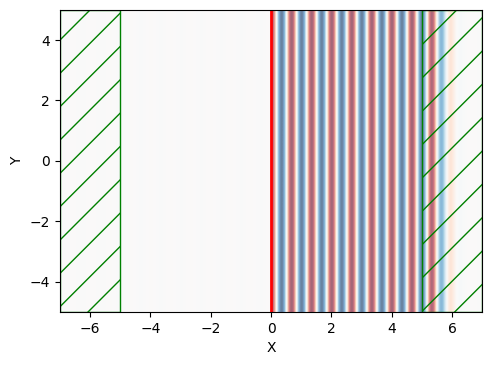

-----------
Initializing structure...
Meep: using complex fields.
Meep progress: 3.87/100.0 = 3.9% done in 4.0s, 99.5s to go
Meep progress: 8.57/100.0 = 8.6% done in 8.0s, 85.4s to go
Meep progress: 14.43/100.0 = 14.4% done in 12.0s, 71.2s to go
Meep progress: 19.23/100.0 = 19.2% done in 16.0s, 67.3s to go
Meep progress: 24.62/100.0 = 24.6% done in 20.0s, 61.3s to go
Meep progress: 30.2/100.0 = 30.2% done in 24.0s, 55.5s to go
Meep progress: 36.06/100.0 = 36.1% done in 28.0s, 49.7s to go
Meep progress: 41.77/100.0 = 41.8% done in 32.0s, 44.7s to go
Meep progress: 46.78/100.0 = 46.8% done in 36.0s, 41.0s to go
Meep progress: 52.68/100.0 = 52.7% done in 40.0s, 36.0s to go
Meep progress: 58.67/100.0 = 58.7% done in 44.1s, 31.0s to go
Meep progress: 64.54/100.0 = 64.5% done in 48.1s, 26.4s to go
Meep progress: 70.48/100.0 = 70.5% done in 52.1s, 21.8s to go
Meep progress: 76.5/100.0 = 76.5% done in 56.1s, 17.2s to go
Meep progress: 81.32000000000001/100.0 = 81.3% done in 60.1s, 13.8s to go


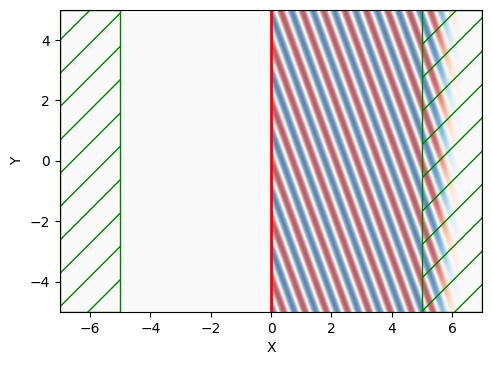

-----------
Initializing structure...
Meep: using complex fields.
Meep progress: 5.2700000000000005/100.0 = 5.3% done in 4.0s, 72.0s to go
Meep progress: 10.35/100.0 = 10.3% done in 8.0s, 69.4s to go
Meep progress: 15.610000000000001/100.0 = 15.6% done in 12.0s, 64.9s to go
Meep progress: 21.490000000000002/100.0 = 21.5% done in 16.0s, 58.5s to go
Meep progress: 27.37/100.0 = 27.4% done in 20.0s, 53.1s to go
Meep progress: 33.26/100.0 = 33.3% done in 24.0s, 48.2s to go
Meep progress: 38.52/100.0 = 38.5% done in 28.0s, 44.7s to go
Meep progress: 43.32/100.0 = 43.3% done in 32.0s, 41.9s to go
Meep progress: 47.58/100.0 = 47.6% done in 36.0s, 39.7s to go
Meep progress: 51.89/100.0 = 51.9% done in 40.0s, 37.1s to go
Meep progress: 57.2/100.0 = 57.2% done in 44.0s, 33.0s to go
Meep progress: 63.230000000000004/100.0 = 63.2% done in 48.0s, 27.9s to go
Meep progress: 67.82000000000001/100.0 = 67.8% done in 52.0s, 24.7s to go
Meep progress: 72.65/100.0 = 72.7% done in 56.0s, 21.1s to go
Meep p

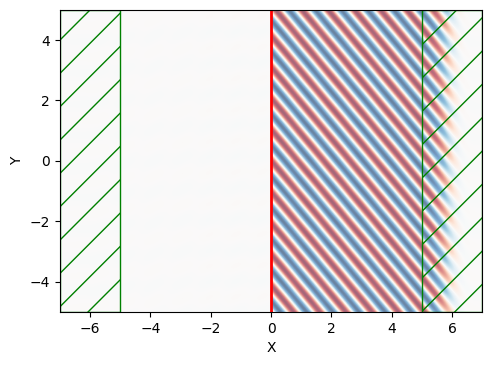

In [3]:
for rot_angle in np.radians([0, 20, 40]):
    run_sim(rot_angle)

Note that this example involves a `ContinuousSource` for the time profile. For a pulsed source, the oblique planewave is incident at a given angle for only a *single* frequency component of the source. This is a fundamental feature of FDTD simulations and not of Meep per se. Thus, to simulate an incident planewave at multiple angles for a given frequency ω, you will need to do separate simulations involving different values of $\vec{k}$ (`k_point`) since each set of ($\vec{k}$,ω) specifying the Bloch-periodic boundaries and the frequency of the source will produce a different angle of the planewave. For more details, refer to Section 4.5 ("Efficient Frequency-Angle Coverage") in [Chapter 4](https://arxiv.org/abs/1301.5366) ("Electromagnetic Wave Source Conditions") of [Advances in FDTD Computational Electrodynamics: Photonics and Nanotechnology](https://www.amazon.com/Advances-FDTD-Computational-Electrodynamics-Nanotechnology/dp/1608071707).